In [24]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

###  <font color="cyan"><i>Log Transform</i></font>

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/SumanGouda/Scikit-Learn-/refs/heads/main/Feature%20Engineering/Data%20Extraction/laptops_new.csv')

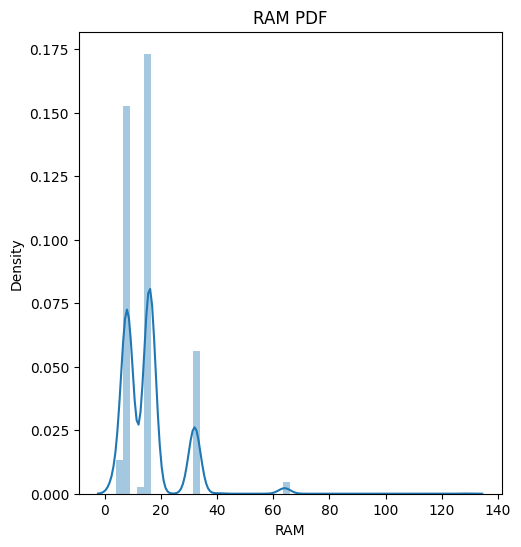

In [42]:
req_df = df[['RAM', 'Final Price', 'release_year', 'Storage', 'Laptop']]
req_df['release_year'] = pd.to_numeric(req_df['release_year'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(req_df['RAM'])
plt.title('RAM PDF')
plt.show()

In [36]:
req_df.columns

Index(['RAM', 'Final Price', 'release_year', 'Storage', 'Laptop'], dtype='object')

##### As the above data is right skewed so we will apply the log transformation on RAM column.

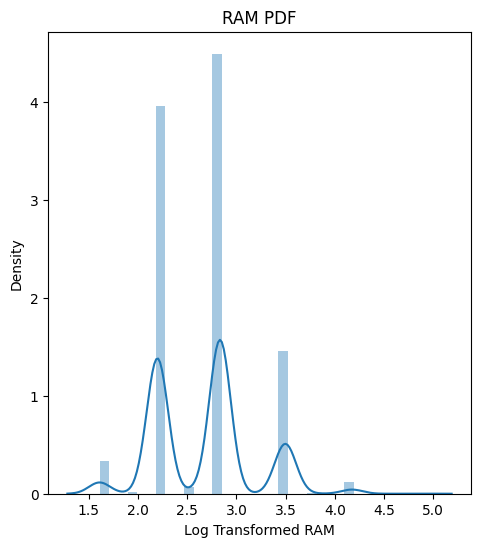

In [29]:
from sklearn.preprocessing import FunctionTransformer

trf1 = FunctionTransformer(np.log1p)
transformed_array = trf1.fit_transform(req_df['RAM'].values.reshape(-1, 1))

transformed_ram_df = pd.DataFrame(transformed_array, columns=['Log Transformed RAM'])

plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(transformed_ram_df['Log Transformed RAM'])
plt.title('RAM PDF')
plt.show()

###  <font color="Yellow"><i>Square Transform</i></font>

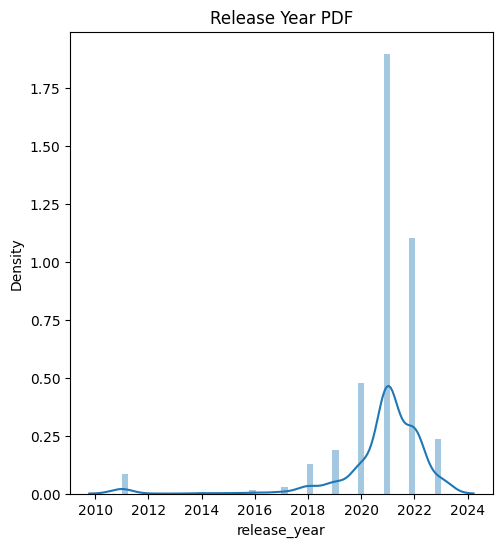

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(req_df['release_year'])
plt.title('Release Year PDF')
plt.show()

#### The above data is left skewed data so we will gonna apply srqare transform in it. 

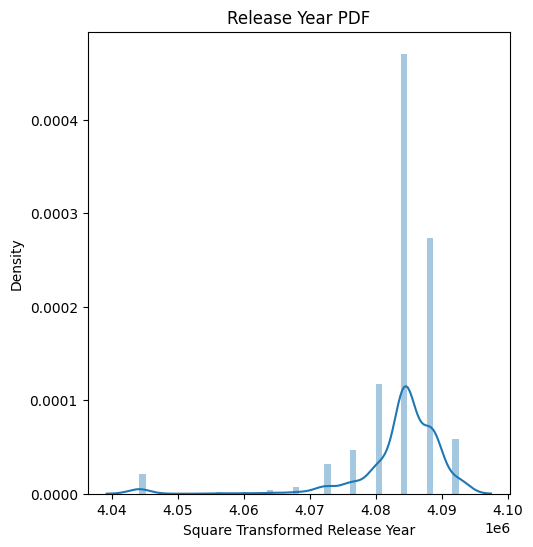

In [ ]:
trf2 = FunctionTransformer(np.square)
transformed_array = trf2.fit_transform(req_df['release_year'].values.reshape(-1, 1))

transformed_release_year_df = pd.DataFrame(transformed_array, columns=['Square Transformed Release Year'])

plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(transformed_release_year_df['Square Transformed Release Year'])
plt.title('Release Year PDF')
plt.show()

###  <font color="orange"><i>Box Cox & Yeo-Johnson Power Transform</i></font>

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/SumanGouda/Scikit-Learn-/refs/heads/main/DATA%20PROCESSING/Data%20Extraction/Copy%20of%20US%20Superstore%20data.csv')
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
columns_to_drop = [
    'Row ID', 'Order ID', 'Order Date', 'Ship Date',
    'Ship Mode', 'Customer ID', 'Customer Name',
    'Segment', 'Country', 'City', 'State', 'Postal Code',
    'Region', 'Product ID', 'Category', 'Sub-Category',
    'Product Name'
]
# Before Power Transformation
df = df.drop(columns = columns_to_drop, errors='ignore')
df.head()


,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


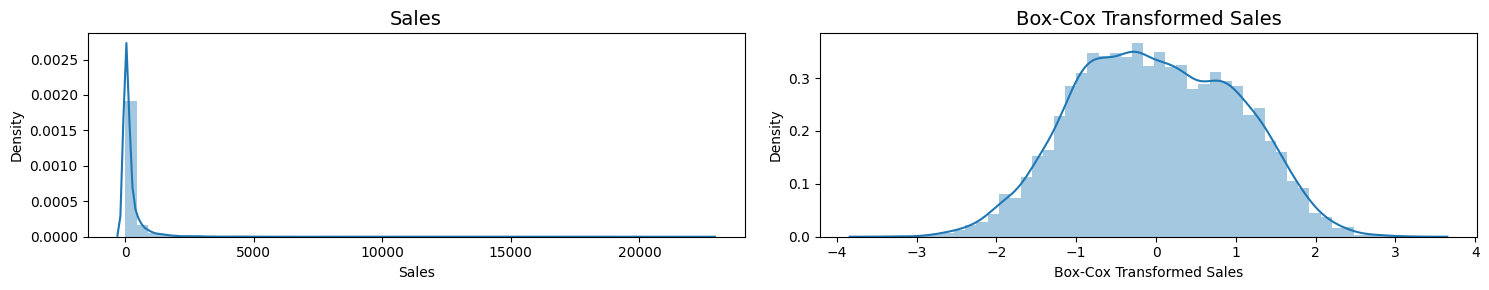

In [68]:
# Create a figure with two subplots
plt.figure(figsize=(15, 3))

# Plot the original sales distribution on the first subplot
plt.subplot(1, 2, 1)
sns.distplot(df['Sales'])
plt.title('Sales', fontsize=14)

# After Power Transformation
pt = PowerTransformer(method='box-cox')
pt.fit(df['Sales'].values.reshape(-1, 1))
transformed_array = pt.transform(df['Sales'].values.reshape(-1, 1))
transformed_sales_df = pd.DataFrame(transformed_array, columns=['Box-Cox Transformed Sales'])

# Plot the transformed sales distribution on the second subplot
plt.subplot(1, 2, 2)
sns.distplot(transformed_sales_df['Box-Cox Transformed Sales'])
plt.title('Box-Cox Transformed Sales', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [71]:
df['Discount'].describe()

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

Text(0.5, 1.0, 'Yeo-Johnson Transformed Discount')

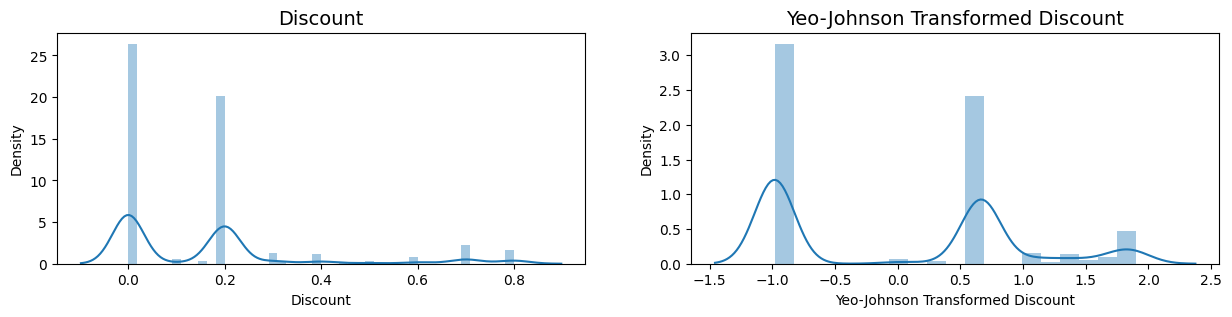

In [73]:
# Create a figure with two subplots
plt.figure(figsize=(15, 3))

# Plot the original sales distribution on the first subplot
plt.subplot(1, 2, 1)
sns.distplot(df['Discount'])
plt.title('Discount', fontsize=14)

# After Power Transformation
pt = PowerTransformer(method='yeo-johnson')
pt.fit(df['Discount'].values.reshape(-1, 1))
transformed_array = pt.transform(df['Discount'].values.reshape(-1, 1))
transformed_discount_df = pd.DataFrame(transformed_array, columns=['Yeo-Johnson Transformed Discount'])

# Plot the transformed sales distribution on the second subplot
plt.subplot(1, 2, 2)
sns.distplot(transformed_discount_df['Yeo-Johnson Transformed Discount'])
plt.title('Yeo-Johnson Transformed Discount', fontsize=14)

Text(0.5, 1.0, 'Transformed Discount')

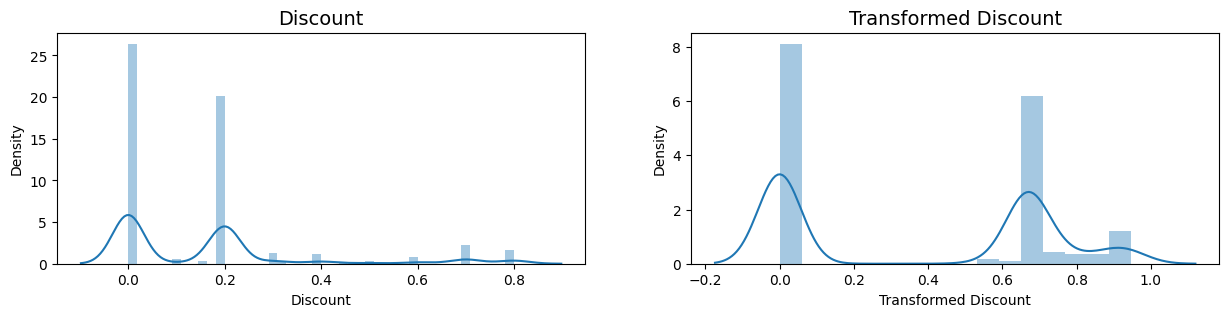

In [80]:
# Create a figure with two subplots
plt.figure(figsize=(15, 3))

# Plot the original sales distribution on the first subplot
plt.subplot(1, 2, 1)
sns.distplot(df['Discount'])
plt.title('Discount', fontsize=14)

# Applying Log Transform to Discount column
log_trf = FunctionTransformer(lambda x: np.power(x, 1/4))
log_trf.fit(df['Discount'].values.reshape(-1, 1))

transformed_array = log_trf.transform(df['Discount'].values.reshape(-1, 1))
transformed_discount_df = pd.DataFrame(transformed_array, columns=['Transformed Discount'])

# Plot the transformed sales distribution on the second subplot
plt.subplot(1, 2, 2)
sns.distplot(transformed_discount_df['Transformed Discount'])
plt.title('Transformed Discount', fontsize=14)